### MODEL FOR PERCLOS NEURAL NET

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### GETTING Data

In [2]:
# dfAwake_train = pd.read_csv('Data/Data for 2nd Level Classification/training2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train = pd.read_csv('Data/Data for 2nd Level Classification/training2_DData.txt', header=None, delim_whitespace=True)
# dfAwake_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_test = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

# Validation Data plus Testing Data
# dfAwake_train1 = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train1 = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)
# dfAwake_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_train2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)

# Validation Data Only
dfAwake_train = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_train = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)

In [3]:
# Awake_frames = [dfAwake_train1, dfAwake_train2]
# Drowsy_frames = [dfDrowsy_train1, dfDrowsy_train2]
# dfAwake_train = pd.concat(Awake_frames)
# dfDrowsy_train = pd.concat(Drowsy_frames)

### Printing Retrieved Data informations

In [4]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfAwake_test.shape)
# print(dfDrowsy_test.shape)

(1620000, 15)
(1620000, 15)


### Dropping Not Needed Columns

In [5]:
dfAwake_train = dfAwake_train.drop(11,axis = 1)
dfAwake_train = dfAwake_train.drop(dfAwake_train.iloc[:,0:11],axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(11,axis = 1)
dfDrowsy_train = dfDrowsy_train.drop(dfDrowsy_train.iloc[:,0:11],axis = 1)
# dfAwake_test = dfAwake_test.drop(11,axis = 1)
# dfAwake_test = dfAwake_test.drop(dfAwake_test.iloc[:,0:11],axis = 1)
# dfDrowsy_test = dfDrowsy_test.drop(11,axis = 1)
# dfDrowsy_test = dfDrowsy_test.drop(dfDrowsy_test.iloc[:,0:11],axis = 1)

In [6]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfAwake_test.shape)
# print(dfDrowsy_test.shape)

(1620000, 3)
(1620000, 3)


### RESHAPING DATA

In [7]:
dfAwake_train = dfAwake_train.to_numpy()
dfDrowsy_train = dfDrowsy_train.to_numpy()
dfAwake_train = dfAwake_train.reshape(1800,900,3)
dfDrowsy_train = dfDrowsy_train.reshape(1800,900,3)
# dfAwake_test = dfAwake_test.to_numpy()
# dfDrowsy_test = dfDrowsy_test.to_numpy()
# dfAwake_test = dfAwake_test.reshape(900,900,3)
# dfDrowsy_test = dfDrowsy_test.reshape(1200,900,3)

In [8]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfAwake_test.shape)
# print(dfDrowsy_test.shape)
# print(dfAwake_train)
# print(dfDrowsy_train)

(1800, 900, 3)
(1800, 900, 3)


### CREATING LABELS

In [9]:
dfAwake_trainLabels = np.zeros(1800)
print(dfAwake_trainLabels.shape)
dfDrowsy_trainLabels = np.ones(1800)
print(dfDrowsy_trainLabels.shape)
# dfAwake_testLabels = np.zeros(900)
# print(dfAwake_testLabels.shape)
# dfDrowsy_testLabels = np.ones(1200)
# print(dfDrowsy_testLabels.shape)

(1800,)
(1800,)


In [10]:
print(dfAwake_trainLabels)
print(dfDrowsy_trainLabels)
# print(dfAwake_testLabels)
# print(dfDrowsy_testLabels)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]


### Combining Awake Data and Drowsy Data

In [11]:
dftrain = np.concatenate((dfAwake_train, dfDrowsy_train))
dftrainlabels =np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels))
# dftrain = dfAwake_train
# dftrainlabels = dfAwake_trainLabels
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(3600, 900, 3)
(3600,)
[[[-2.79859103e-02  4.19391146e-02  4.77777800e+00]
  [-2.06010176e-02  5.79664893e-02  4.77777800e+00]
  [ 2.63604420e-02  8.98068149e-03  4.77777800e+00]
  ...
  [ 1.53091817e-02 -3.98974481e-02  4.55555500e+00]
  [ 3.75500827e-02 -2.22858040e-03  4.55555500e+00]
  [ 2.24502029e-02  3.17779331e-02  4.55555500e+00]]

 [[-2.06010176e-02  5.79664893e-02  4.77777800e+00]
  [ 2.63604420e-02  8.98068149e-03  4.77777800e+00]
  [ 5.50962085e-02 -7.21536579e-02  4.77777800e+00]
  ...
  [ 3.75500827e-02 -2.22858040e-03  4.55555500e+00]
  [ 2.24502029e-02  3.17779331e-02  4.55555500e+00]
  [-5.28714580e-04  3.81005612e-02  4.55555500e+00]]

 [[ 2.63604420e-02  8.98068149e-03  4.77777800e+00]
  [ 5.50962085e-02 -7.21536579e-02  4.77777800e+00]
  [ 6.09831295e-02 -1.14505984e-02  5.00000000e+00]
  ...
  [ 2.24502029e-02  3.17779331e-02  4.55555500e+00]
  [-5.28714580e-04  3.81005612e-02  4.55555500e+00]
  [ 1.10392899e-03  1.17459408e-02  4.55555500e+00]]

 ...

 [[-2.23714

### SHUFFLING DATA

In [12]:
idx = np.random.permutation(len(dftrainlabels))
print(idx)

[  76 1982 2584 ... 3259 2217 3065]


In [13]:
dftrain=dftrain[idx]
dftrainlabels=dftrainlabels[idx]

In [14]:
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(3600, 900, 3)
(3600,)
[[[ 1.95766208e-03  7.30325887e-03  5.44444400e+00]
  [-8.44750262e-03 -1.44311776e-02  5.44444400e+00]
  [-2.01248049e-03 -2.08245877e-02  5.44444400e+00]
  ...
  [ 5.49808782e-03 -7.56827208e-03  4.44444500e+00]
  [ 2.13633501e-02 -4.05770137e-02  4.44444500e+00]
  [-1.87128423e-02 -2.95177755e-03  4.44444500e+00]]

 [[ 1.83766299e-02  1.39344454e-02  6.66666700e+00]
  [ 1.58566714e-02 -1.33048855e-03  6.66666700e+00]
  [ 1.92426064e-02  5.25174860e-03  6.88888900e+00]
  ...
  [ 2.48086271e-02  9.13050126e-05  3.00000000e+00]
  [ 4.79397064e-02 -1.35131275e-02  3.00000000e+00]
  [ 6.01115662e-02 -2.19802351e-02  3.00000000e+00]]

 [[ 4.34950065e-03  3.18286937e-05  8.55555500e+00]
  [-7.29113624e-03  9.99300143e-04  8.55555500e+00]
  [-2.38130413e-03  2.63922241e-04  8.77777800e+00]
  ...
  [ 7.12875519e-03  8.63658803e-03  1.18888890e+01]
  [ 7.04022845e-03 -1.01600542e-02  1.18888890e+01]
  [ 3.74283066e-03 -1.15434792e-02  1.18888890e+01]]

 ...

 [[ 3.07410

In [15]:
# dftest = np.concatenate((dfAwake_test, dfDrowsy_test))
# dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels))
# print(dftest.shape)
# print(dftestlabels.shape)
# print(dftest)
# print(dftestlabels)

In [16]:
# print(dftest.shape)
# print(dftestlabels.shape)
# print(dftrain.shape)
# print(dftrainlabels.shape)

### Set input and output dimensions

In [17]:
input_shape = 900*3
num_classes = 2
print('dftrain shape:', dftrain.shape)
print('input_shape:', input_shape)

dftrain shape: (3600, 900, 3)
input_shape: 2700


In [18]:
dftrain = dftrain.astype('float32')
dftrainlabels = dftrainlabels.astype('float32')

In [19]:
dftrainlabels_hot = np_utils.to_categorical(dftrainlabels,num_classes)
print('New dfttrainlabels shape: ', dftrainlabels_hot)

New dfttrainlabels shape:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [20]:
print('New dfttrainlabels shape: ', dftrainlabels_hot.shape)
print(dftrainlabels)

New dfttrainlabels shape:  (3600, 2)
[0. 1. 1. ... 1. 1. 1.]


In [21]:
print(dftrain.shape)
print(dftrainlabels.shape)

(3600, 900, 3)
(3600,)


In [22]:
LABELS = ['Awake','Drowsy']

In [23]:
model = keras.models.load_model("best_model(single-level(withouteegv2)).h5")

test_loss, test_acc = model.evaluate(dftrain, dftrainlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

max_y_train = np.argmax(dftrainlabels_hot, axis=1)

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

113/113 [==============================] - 1s 6ms/step - loss: 0.3992 - sparse_categorical_accuracy: 0.7417
Test accuracy 0.7416666746139526
Test loss 0.399169385433197
113/113 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72      1800
         1.0       0.71      0.82      0.76      1800

    accuracy                           0.74      3600
   macro avg       0.75      0.74      0.74      3600
weighted avg       0.75      0.74      0.74      3600



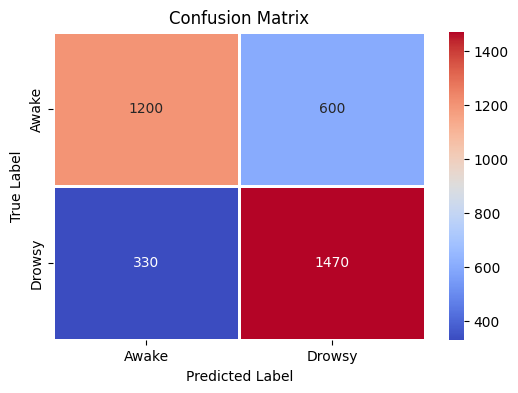

In [24]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

show_confusion_matrix(max_y_train, max_y_pred_train)

### Building the MODEL

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    gap = keras.layers.GlobalAveragePooling1D()(conv2)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=dftrain.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# dftrain = dftrain.reshape(dftrain.shape[0],input_shape)
# model = Sequential()
# # Remark: since coreml cannot accept vector shapes of complex shape like
# # [80,3] this workaround is used in order to reshape the vector internally
# # prior feeding it into the network
# model.add(Reshape((900, 3), input_shape=(input_shape,)))
# model.add(Dense(25, activation='relu'))
# # # model_m.add(BatchNormalization()) # V2 addition
# # model_m.add(Dense(100, activation='relu'))
# # # model_m.add(BatchNormalization()) # V2 addition
# # model_m.add(Dense(100, activation='relu'))
# # # model_m.add(BatchNormalization()) # V2 addition 
# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))
# keras.utils.plot_model(model, show_shapes=True)
# # print(model.summary())

### FITTING Deep neural network Model in KERAS

In [ ]:
epochs = 100
batch_size = 540 #540

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(single-level(withouteeg)).h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=5, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, verbose=1),
]
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
# model.compile(
#     optimizer=optimizer,
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
history = model.fit(
    dftrain,
    dftrainlabels,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.4,
    verbose=1,
)
# history = model.fit(
#     dftrain,
#     dftrainlabels_hot,
#     batch_size=batch_size,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_split=0.4,
#     verbose=1,
# )

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val","loss","val_loss"], loc="best")
plt.show()
plt.close()

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

### Checking against Testing Data

In [ ]:

# Set input_shape / reshape for Keras
# dftest = dftest.reshape(dftest.shape[0], input_shape)

dftest = dftest.astype('float32')
dftestlabels = dftestlabels.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [ ]:
print('New dfttrainlabels shape: ', dftestlabels_hot)
print('New dfttrainlabels shape: ', dftestlabels.shape)
print('New dfttrainlabels shape: ', dftestlabels)

In [ ]:
# score = model_m.evaluate(dftest, dftestlabels_hot, verbose=1)

# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

In [ ]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

In [ ]:
model = keras.models.load_model("best_model(single-level(withouteeg)).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

# dftest = dftest.reshape(dftest.shape[0],input_shape)

# test_loss, test_acc = model.evaluate(dftest, dftestlabels_hot,verbose=1)

# print("Test accuracy", test_acc)
# print("Test loss", test_loss)

In [ ]:
# # Print confusion matrix for training data
# y_pred_train = model.predict(dftest)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(classification_report(dftestlabels, max_y_pred_train))

In [ ]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

In [ ]:
# model = keras.models.load_model("best_model.h5")
# print(model.summary())